# Misc constraints

Astro & cosmo, beam dumps and Pb collisions, recast from $g_{a\gamma\gamma}$ bounds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import particle.literals
import numpy as np
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

In [2]:
me = particle.literals.e_minus.mass / 1e6 # TeV

# Astro and cosmo

In [3]:
#sn1987a = pd.read_csv('../data/astro_cosmo/SN1987.csv') #2107.12393

df_sn_gamma = pd.read_csv('SN1987A_gamma.txt', skiprows=4, sep='\t', names=['ma_eV', 'g_gamma']) #2304.01060
df_sn_nu = pd.read_csv('SN1987A_nu.txt', skiprows=3, sep='\t', names=['ma_eV', 'g_gamma']) #2201.09890
df_sn_pvo = pd.read_csv('SN1987A_PVO.txt', skiprows=2, sep='\t', names=['ma_eV', 'g_gamma']) #2303.11395
df_sne = pd.read_csv('SNe.txt', skiprows=3, sep='\t', names=['ma_eV', 'g_gamma']) #2201.09890
df_gw_fermi = pd.read_csv('GW170817_Fermi.txt', skiprows=3, sep='\t', names=['ma_eV', 'g_gamma']) #2305.01002
df_gw_fireball = pd.read_csv('GW170817_fireball.txt', skiprows=4, sep='\t', names=['ma_eV', 'g_gamma']) #2305.10327

In [4]:
me = particle.literals.e_minus.mass/1000
mmu = particle.literals.mu_minus.mass/1000
mtau = particle.literals.tau_minus.mass/1000
mZ = particle.literals.Z_0.mass/1000
alpha_em = 1/137
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
c2W = 1-s2W
Lambda = 1000

In [5]:
def Cgammagamma(ma, mlep, cgg0=0):
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    A1 = lambda x: x*(1-(x-1)*f(x)**2)
    c = cgg0
    for m in mlep:
        c += A1(4*m**2/ma**2)
    return -c*alpha_em/np.pi

Text(0, 0.5, '$|y_\\ell|/f_\\phi$ [TeV$^{-1}$]')

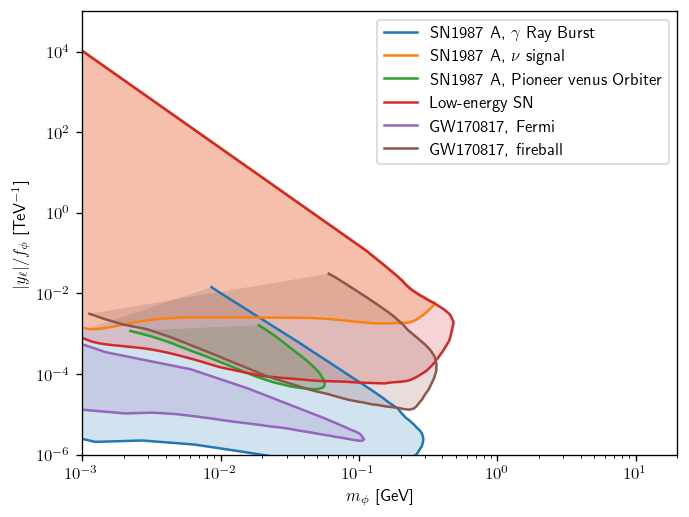

In [24]:
plt.figure(dpi=120)
plt.loglog(df_sn_gamma['ma_eV']*1e-9, [1000*df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_gamma.index], label=r'SN1987 A, $\gamma$ Ray Burst')
plt.fill(df_sn_gamma['ma_eV']*1e-9, [1000*df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_gamma.index], alpha=0.2)
plt.loglog(df_sn_nu['ma_eV']*1e-9, [1000*df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_nu.index], label=r'SN1987 A, $\nu$ signal')
plt.fill(df_sn_nu['ma_eV']*1e-9, [1000*df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_nu.index], alpha=0.2)
plt.loglog(df_sn_pvo['ma_eV']*1e-9, [1000*df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_pvo.index], label='SN1987 A, Pioneer venus Orbiter')
plt.fill(df_sn_pvo['ma_eV']*1e-9, [1000*df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sn_pvo.index], alpha=0.2)
plt.loglog(df_sne['ma_eV']*1e-9, [1000*df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sne.index], label='Low-energy SN')
plt.fill(df_sne['ma_eV']*1e-9, [1000*df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_sne.index], alpha=0.2)
plt.loglog(df_gw_fermi['ma_eV']*1e-9, [1000*df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fermi.index], label='GW170817, Fermi')
plt.fill(df_gw_fermi['ma_eV']*1e-9, [1000*df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fermi.index], alpha=0.2)
plt.loglog(df_gw_fireball['ma_eV']*1e-9, [1000*df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fireball.index], label='GW170817, fireball')
plt.fill(df_gw_fireball['ma_eV']*1e-9, [1000*df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in df_gw_fireball.index], alpha=0.2)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(1e-3, 20)
plt.ylim(1e-6, 1e5)
plt.legend()
plt.xlabel(r'$m_\phi$ [GeV]')
plt.ylabel(r'$|y_\ell|/f_\phi$ [TeV$^{-1}$]')

Text(0, 0.5, '$|y_\\tau|/f_\\phi$ [TeV$^{-1}$]')

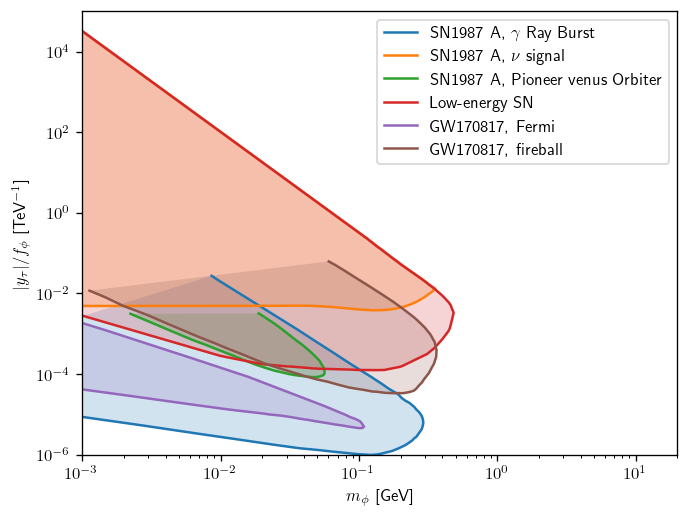

In [23]:
plt.figure(dpi=120)
plt.loglog(df_sn_gamma['ma_eV']*1e-9, [1000*df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_gamma.index], label=r'SN1987 A, $\gamma$ Ray Burst')
plt.fill(df_sn_gamma['ma_eV']*1e-9, [1000*df_sn_gamma['g_gamma'][i]/np.abs(Cgammagamma(df_sn_gamma['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_gamma.index], alpha=0.2)
plt.loglog(df_sn_nu['ma_eV']*1e-9, [1000*df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_nu.index], label=r'SN1987 A, $\nu$ signal')
plt.fill(df_sn_nu['ma_eV']*1e-9, [1000*df_sn_nu['g_gamma'][i]/np.abs(Cgammagamma(df_sn_nu['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_nu.index], alpha=0.2)
plt.loglog(df_sn_pvo['ma_eV']*1e-9, [1000*df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_pvo.index], label='SN1987 A, Pioneer venus Orbiter')
plt.fill(df_sn_pvo['ma_eV']*1e-9, [1000*df_sn_pvo['g_gamma'][i]/np.abs(Cgammagamma(df_sn_pvo['ma_eV'][i]*1e-9, [mtau])) for i in df_sn_pvo.index], alpha=0.2)
plt.loglog(df_sne['ma_eV']*1e-9, [1000*df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [mtau])) for i in df_sne.index], label='Low-energy SN')
plt.fill(df_sne['ma_eV']*1e-9, [1000*df_sne['g_gamma'][i]/np.abs(Cgammagamma(df_sne['ma_eV'][i]*1e-9, [mtau])) for i in df_sne.index], alpha=0.2)
plt.loglog(df_gw_fermi['ma_eV']*1e-9, [1000*df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fermi.index], label='GW170817, Fermi')
plt.fill(df_gw_fermi['ma_eV']*1e-9, [1000*df_gw_fermi['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fermi['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fermi.index], alpha=0.2)
plt.loglog(df_gw_fireball['ma_eV']*1e-9, [1000*df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fireball.index], label='GW170817, fireball')
plt.fill(df_gw_fireball['ma_eV']*1e-9, [1000*df_gw_fireball['g_gamma'][i]/np.abs(Cgammagamma(df_gw_fireball['ma_eV'][i]*1e-9, [mtau])) for i in df_gw_fireball.index], alpha=0.2)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(1e-3, 20)
plt.ylim(1e-6, 1e5)
plt.legend()
plt.xlabel(r'$m_\phi$ [GeV]')
plt.ylabel(r'$|y_\tau|/f_\phi$ [TeV$^{-1}$]')

In [8]:
bounds = {'sn_gamma': df_sn_gamma, 'sn_nu': df_sn_nu, 'sn_pvo': df_sn_pvo, 'sne': df_sne, 'gw_fermi': df_gw_fermi, 'gw_fireball': df_gw_fireball}

for k, v in bounds.items():
    pd.DataFrame({'ma_GeV': v['ma_eV']*1e-9,
                 'cl_TeV-1': [1000*v['g_gamma'][i]/np.abs(Cgammagamma(v['ma_eV'][i]*1e-9, [me, mmu, mtau])) for i in v.index],
                 'ctau_TeV-1': [1000*v['g_gamma'][i]/np.abs(Cgammagamma(v['ma_eV'][i]*1e-9, [mtau])) for i in v.index]}).to_csv(f'../data/astro_cosmo/{k}.csv', index=False)


# Ultraperipheral Pb-Pb collisions

In [9]:
def Gamma_phi(mphi: float) -> list[float]:
    chiV = 0
    chiA = 1
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    kallen = lambda x, y, z: x**2+y**2+z**2-2*x*y-2*x*z-2*y*z
    res = [chiA**2*alpha_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*me:
        res[1] = chiA**2*mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    if mphi > 2*mmu:
        res[2] = chiA**2*mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau	:
        res[3] = chiA**2*mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = chiA*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2)+B3(4*me**2/mphi**2, 4*me**2/mZ**2)+B3(4*mmu**2/mphi**2, 4*mmu**2/mZ**2))**2-3*chiV/(2*s2W**0.5*c2W**0.5)
        res[4] = alpha_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    #if mphi > mZ+mhiggs:
    #    res[7] = 1/(2*(8*np.pi)**3*Lambda**2*vev**2)*kallen(mphi**2, mhiggs**2, mZ**2)**1.5/(mphi**3*mZ**2)*(me**2*FHiggs(mphi, me)+mmu**2*FHiggs(mphi, mmu)+mtau**2*FHiggs(mphi, mtau))**2
    return res

def br_gamma(mphi):
    gamma = Gamma_phi(mphi)
    return gamma[0]/sum(gamma)

In [10]:
CMS_PbPb = pd.read_csv('CMS_PbPb.csv') #CMS Pb-Pb, 1810.04602 Fig.7
ATLAS_PbPb = pd.read_csv('ATLAS_PbPb.csv') #ATLAS Pb-Pb, 2008.05355 Fig.10

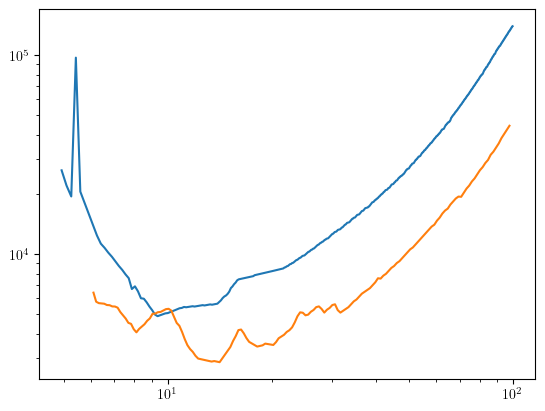

In [11]:
plt.loglog(CMS_PbPb['ma_GeV'], [CMS_PbPb['gagg_GeV-1'][i]*1000/np.abs(Cgammagamma(CMS_PbPb['ma_GeV'][i], [me, mmu, mtau]))/np.sqrt(br_gamma(CMS_PbPb['ma_GeV'][i])) for i in CMS_PbPb.index])
plt.loglog(ATLAS_PbPb['ma_GeV'], [ATLAS_PbPb['gagg_TeV-1'][i]/np.abs(Cgammagamma(ATLAS_PbPb['ma_GeV'][i], [me, mmu, mtau]))/np.sqrt(br_gamma(ATLAS_PbPb['ma_GeV'][i])) for i in ATLAS_PbPb.index])

In [12]:
def Gamma_phi_tp(mphi: float) -> list[float]:
    chiV = 0
    chiA = 1
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    B3 = lambda x, y: 1- x*y/(y-x)*(f(x)**2-f(y)**2)
    kallen = lambda x, y, z: x**2+y**2+z**2-2*x*y-2*x*z-2*y*z
    res = [chiA**2*alpha_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0, 0, 0, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    #if mphi > 2*me:
    #    res[1] = chiA**2*mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    #if mphi > 2*mmu:
    #    res[2] = chiA**2*mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau:
        res[3] = chiA**2*mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    if mphi > mZ:
        cgammaZ = chiA*(1-4*s2W)/(2*s2W**0.5*c2W**0.5)*abs(B3(4*mtau**2/mphi**2, 4*mtau**2/mZ**2))**2-3*chiV/(2*s2W**0.5*c2W**0.5)
        res[4] = alpha_em**2*mphi**3/(2*Lambda**2*(4*np.pi)**3)*(1-mZ**2/mphi**2)**3*abs(cgammaZ)**2
    #if mphi > mZ+mhiggs:
    #    res[7] = 1/(2*(8*np.pi)**3*Lambda**2*vev**2)*kallen(mphi**2, mhiggs**2, mZ**2)**1.5/(mphi**3*mZ**2)*(me**2*FHiggs(mphi, me)+mmu**2*FHiggs(mphi, mmu)+mtau**2*FHiggs(mphi, mtau))**2
    return res

def br_gamma_tp(mphi):
    gamma = Gamma_phi_tp(mphi)
    return gamma[0]/sum(gamma)

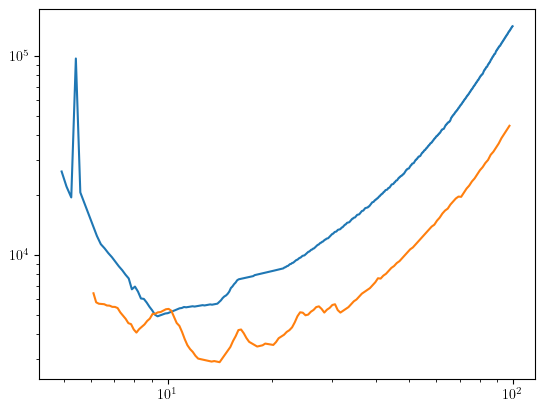

In [13]:
plt.loglog(CMS_PbPb['ma_GeV'], [CMS_PbPb['gagg_GeV-1'][i]*1000/np.abs(Cgammagamma(CMS_PbPb['ma_GeV'][i], [mtau]))/np.sqrt(br_gamma_tp(CMS_PbPb['ma_GeV'][i])) for i in CMS_PbPb.index])
plt.loglog(ATLAS_PbPb['ma_GeV'], [ATLAS_PbPb['gagg_TeV-1'][i]/np.abs(Cgammagamma(ATLAS_PbPb['ma_GeV'][i], [mtau]))/np.sqrt(br_gamma_tp(ATLAS_PbPb['ma_GeV'][i])) for i in ATLAS_PbPb.index])

In [14]:
pd.DataFrame({'ma_GeV': CMS_PbPb['ma_GeV'],
              'cl': [CMS_PbPb['gagg_GeV-1'][i]*1000/np.abs(Cgammagamma(CMS_PbPb['ma_GeV'][i], [me, mmu, mtau]))/np.sqrt(br_gamma(CMS_PbPb['ma_GeV'][i])) for i in CMS_PbPb.index],
              'ctau': [CMS_PbPb['gagg_GeV-1'][i]*1000/np.abs(Cgammagamma(CMS_PbPb['ma_GeV'][i], [mtau]))/np.sqrt(br_gamma_tp(CMS_PbPb['ma_GeV'][i])) for i in CMS_PbPb.index]}
            ).to_csv('../data/astro_cosmo/CMS_PbPb.csv', index=False)

pd.DataFrame({'ma_GeV': ATLAS_PbPb['ma_GeV'],
              'cl': [ATLAS_PbPb['gagg_TeV-1'][i]/np.abs(Cgammagamma(ATLAS_PbPb['ma_GeV'][i], [me, mmu, mtau]))/np.sqrt(br_gamma(ATLAS_PbPb['ma_GeV'][i])) for i in ATLAS_PbPb.index],
              'ctau': [ATLAS_PbPb['gagg_TeV-1'][i]/np.abs(Cgammagamma(ATLAS_PbPb['ma_GeV'][i], [mtau]))/np.sqrt(br_gamma_tp(ATLAS_PbPb['ma_GeV'][i])) for i in ATLAS_PbPb.index]}
            ).to_csv('../data/astro_cosmo/ATLAS_PbPb.csv', index=False)

# Beam dump ($a\to \gamma\gamma$)

In [15]:
bd_gamma_inf = pd.read_csv('beam_dump_gamma_inf.csv')
bd_gamma_sup = pd.read_csv('beam_dump_gamma_sup.csv')

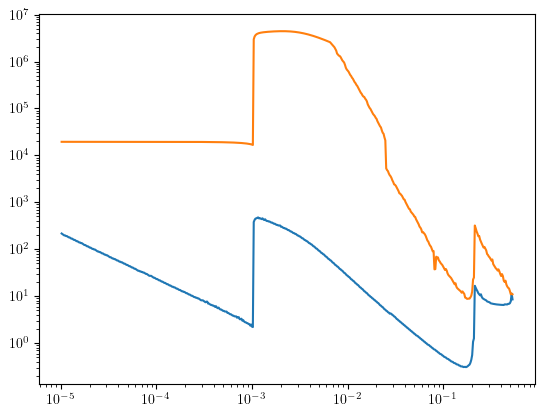

In [16]:
plt.loglog(bd_gamma_inf['ma_GeV'], [bd_gamma_inf['gagg_TeV-1'][i]/np.abs(Cgammagamma(bd_gamma_inf['ma_GeV'][i], [me, mmu, mtau]))/np.sqrt(br_gamma(bd_gamma_inf['ma_GeV'][i])) for i in bd_gamma_inf.index])
plt.loglog(bd_gamma_inf['ma_GeV'], [bd_gamma_sup['gagg_TeV-1'][i]/np.abs(Cgammagamma(bd_gamma_sup['ma_GeV'][i], [me, mmu, mtau]))/np.sqrt(br_gamma(bd_gamma_sup['ma_GeV'][i])) for i in bd_gamma_sup.index])

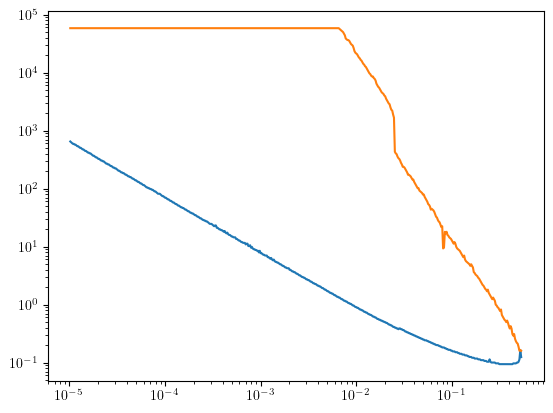

In [18]:
plt.loglog(bd_gamma_inf['ma_GeV'], [bd_gamma_inf['gagg_TeV-1'][i]/np.abs(Cgammagamma(bd_gamma_inf['ma_GeV'][i], [mtau])) for i in bd_gamma_inf.index])
plt.loglog(bd_gamma_sup['ma_GeV'], [bd_gamma_sup['gagg_TeV-1'][i]/np.abs(Cgammagamma(bd_gamma_sup['ma_GeV'][i], [mtau])) for i in bd_gamma_sup.index])

# Beam dump ($a\to e^+e^-$)

In [19]:
e137sup = pd.read_csv('E137_sup.csv')
konsup = pd.read_csv('Konaka_sup.csv')
riosup = pd.read_csv('Riordan_sup.csv')
rioinf = pd.read_csv('Riordan_inf.csv')

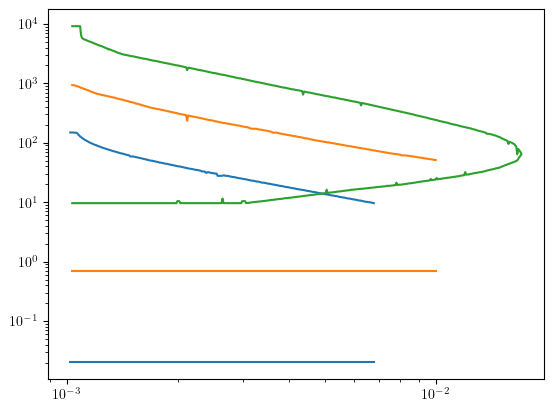

In [20]:
plt.loglog(e137sup['ma_GeV'], e137sup['gee']/me*1000, c='tab:blue')
plt.loglog(e137sup['ma_GeV'], [5e-3/0.246 for i in e137sup.index], c='tab:blue' )
plt.loglog(konsup['ma_GeV'], konsup['gee']/me*1000, c='tab:orange')
plt.loglog(konsup['ma_GeV'], [2e-7*np.pi**0.5/me*1000 for i in konsup.index], c='tab:orange')
plt.loglog(riosup['ma_GeV'], riosup['gee']/me*1000, c='tab:green')
plt.loglog(rioinf['ma_GeV'], rioinf['gee']/me*1000, c='tab:green')